# <div style="background-color:#333;color:#fff;border-radius:20px;padding:15px;text-align:center;margin:0"> 1 | Matplotlib & Main figure object </div>

<img src="OIP.jpg" > 

In [55]:
# !pip install matplotlib
# !pip install seaborn

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data 
df = pd.read_excel("../data/Volve production data.xlsx")

In [3]:
df.head() 

DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000  ...              %    0.00000   
1            0.0                    NaN  ...              %    0.00000   
2            0.0                    NaN  ...              %    0.00000   
3            0.0                    NaN  ...              %    0.00000   
4            0.0              310.37614  ...              %   33.09788   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0    0.00000        0.00000          0.0           0.0           0.0   
1    0.00000        0.00000          0.0           0.0           0.0   
2    0.00000        0.00000          0.0           0.0           0.0   
3    0.00000        0.00000          0.0           0.0           0.0   
4   10.47992       33.07195          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         WI  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 24 columns]

In [5]:
df["WELL_BORE_CODE"].unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

#### Using plt main object
- linestyle
  - `-` -> `solid`
  - `--` -> `dashed`
  - `-.` -> `dashdot`
  - `:` -> `dotted`

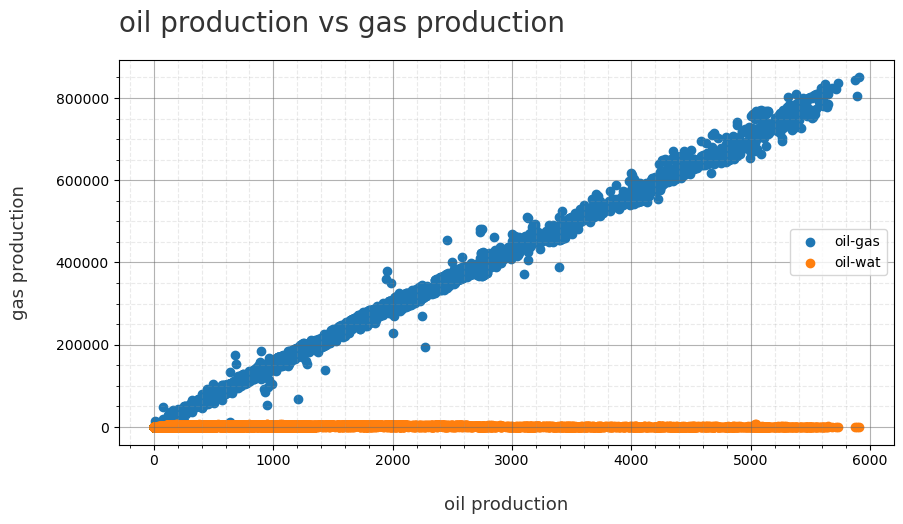

In [92]:
# main figure object
plt.figure(figsize= (10,5))
# make scatter plot between oil and gas production
plt.scatter( df["BORE_OIL_VOL"], df["BORE_GAS_VOL"],label="oil-gas") 
plt.scatter( df["BORE_OIL_VOL"], df["BORE_WAT_VOL"],label="oil-wat") 

# setting axes (x and y) labels 
plt.xlabel("oil production", fontsize= 13, labelpad = 20,color="#333")
plt.ylabel("gas production", fontsize= 13, labelpad = 20,color="#333",loc="center")

# setting figure title 
plt.title("oil production vs gas production ", fontsize= 20, pad = 20,color="#333",loc="left")

# figure legend
plt.legend(loc="center right")

# grid 
plt.grid( which="major", linestyle="-", alpha=.5, color="#6666")
plt.minorticks_on()
plt.grid( which="minor", linestyle="--", alpha=.2, color="#9999")

# saving the figure
plt.savefig("figure_1.png")


### multiples lines in the same axes

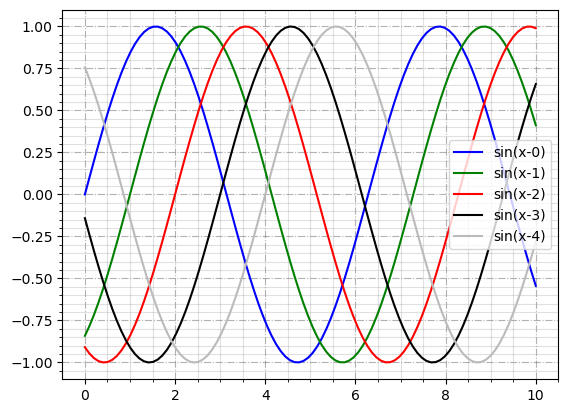

In [93]:
import numpy as np 
x = np.linspace(0,10,100)
ys = [ np.sin(x-i) for i in range(5)]
colors = ["blue","g","red","black","#bbb"]
labels= [f"sin(x-{i})" for i in range(5)]
for i, y in enumerate(ys):
    plt.plot(x,y,label=labels[i],color=colors[i])
# grid 
plt.grid(which="major", color="#6666", linestyle="-.",alpha=.5) 
plt.grid(which="minor", color="#9999", linestyle="-",alpha=.3) 
plt.minorticks_on()

plt.legend() ;
    

# <div style="background-color:#333;color:#fff;border-radius:20px;padding:15px;text-align:center;margin:0"> 2 | seaborn </div>

## <span style="font-weight:900;font-color:#333"> Basic bar chart

In [100]:
# bar chart the number of observations from each well 
d = df["WELL_BORE_CODE"].value_counts()
d

NO 15/9-F-4 AH    3327
NO 15/9-F-5 AH    3306
NO 15/9-F-12 H    3056
NO 15/9-F-14 H    3056
NO 15/9-F-11 H    1165
NO 15/9-F-15 D     978
NO 15/9-F-1 C      746
Name: WELL_BORE_CODE, dtype: int64

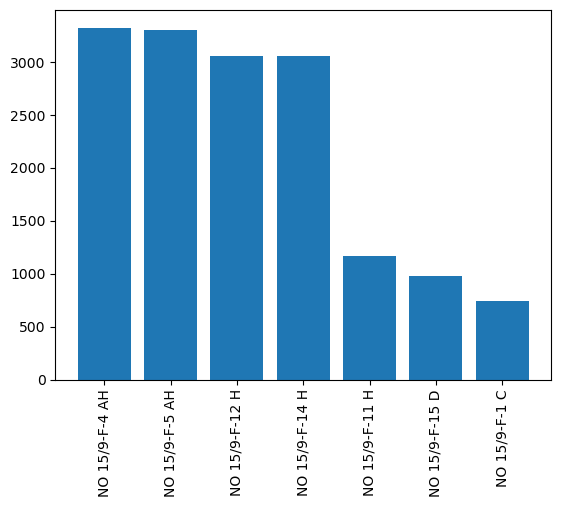

In [104]:
# make plot with matplotlib
plt.bar(d.index , d.values )
plt.xticks(rotation=90);

C:\Users\ae504\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


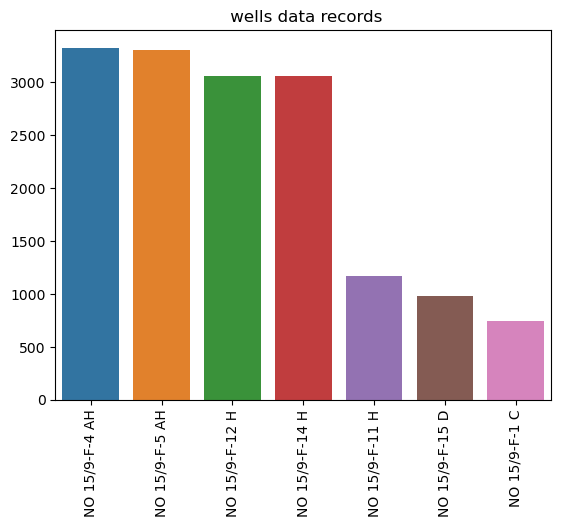

In [109]:
# plotting with seaborn , xticks
sns.barplot(d.index, d.values)
plt.xticks(rotation=90);
plt.title(" wells data records");

## <span style="font-weight:900;font-color:#333"> Pie chart for composition

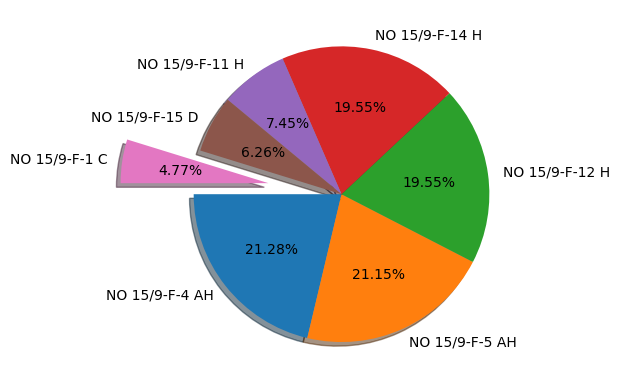

In [125]:
# pie plot with matplotlib , most used arguments { shadow , autopct:"%.2f%% , explode , startangle }
plt.pie(
    x = d.values, 
    labels = d.index,
     autopct = "%.2f%%" ,
     shadow=True,
     explode = [0,0,0,0,0,0,.5],
     startangle=180
       
       );

## <span style="font-weight:900;font-color:#333"> Show production with line chart

In [4]:
df["WELL_BORE_CODE"].unique()
df_one_well = df[ df["WELL_BORE_CODE"] == 'NO 15/9-F-14 H' ]

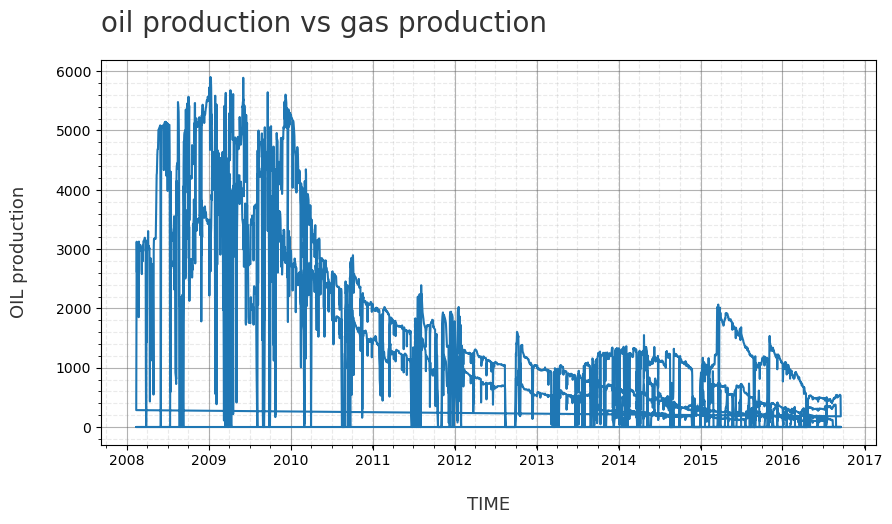

In [5]:
# show the production for all wells  with matplotlib
# main figure object
plt.figure(figsize= (10,5))
# make scatter plot between oil and gas production
plt.plot( df["DATEPRD"], df["BORE_OIL_VOL"]) 
# setting axes (x and y) labels 
plt.xlabel("TIME", fontsize= 13, labelpad = 20,color="#333")
plt.ylabel("OIL production", fontsize= 13, labelpad = 20,color="#333",loc="center")

# setting figure title 
plt.title("oil production vs gas production ", fontsize= 20, pad = 20,color="#333",loc="left")


# grid 
plt.grid( which="major", linestyle="-", alpha=.5, color="#6666")
plt.minorticks_on()
plt.grid( which="minor", linestyle="--", alpha=.2, color="#9999")


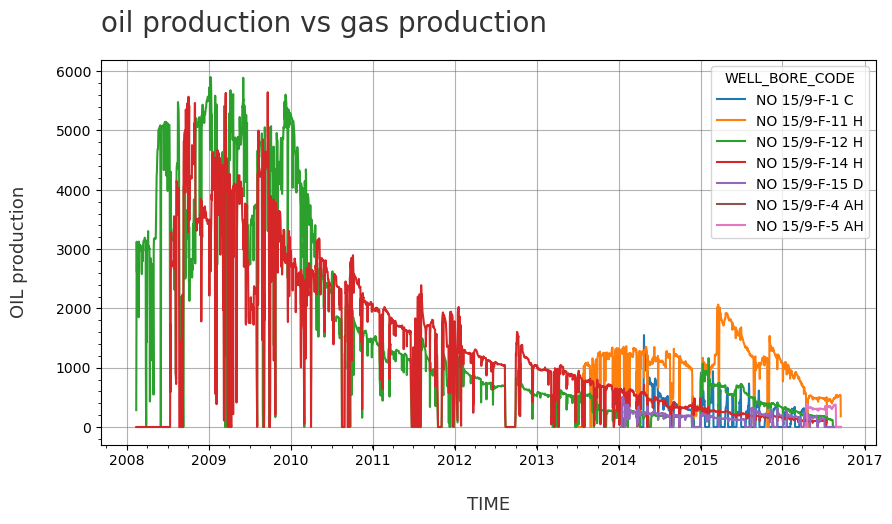

In [6]:
# show the production for all wells  with seabron and makr or hue data from each well 
# show the production for all wells  with matplotlib
# main figure object
plt.figure(figsize= (10,5))
# make scatter plot between oil and gas production
sns.lineplot(data = df, x = "DATEPRD" , y = "BORE_OIL_VOL" , hue = "WELL_BORE_CODE") 
# setting axes (x and y) labels 
plt.xlabel("TIME", fontsize= 13, labelpad = 20,color="#333")
plt.ylabel("OIL production", fontsize= 13, labelpad = 20,color="#333",loc="center")

# setting figure title 
plt.title("oil production vs gas production ", fontsize= 20, pad = 20,color="#333",loc="left")


# grid 
plt.grid( which="major", linestyle="-", alpha=.5, color="#6666")
plt.minorticks_on()

In [13]:
wells = df["WELL_BORE_CODE"].unique()
wells 

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

In [14]:
for i , value in enumerate(wells):
    print(i, value)
    

0 NO 15/9-F-1 C
1 NO 15/9-F-11 H
2 NO 15/9-F-12 H
3 NO 15/9-F-14 H
4 NO 15/9-F-15 D
5 NO 15/9-F-4 AH
6 NO 15/9-F-5 AH


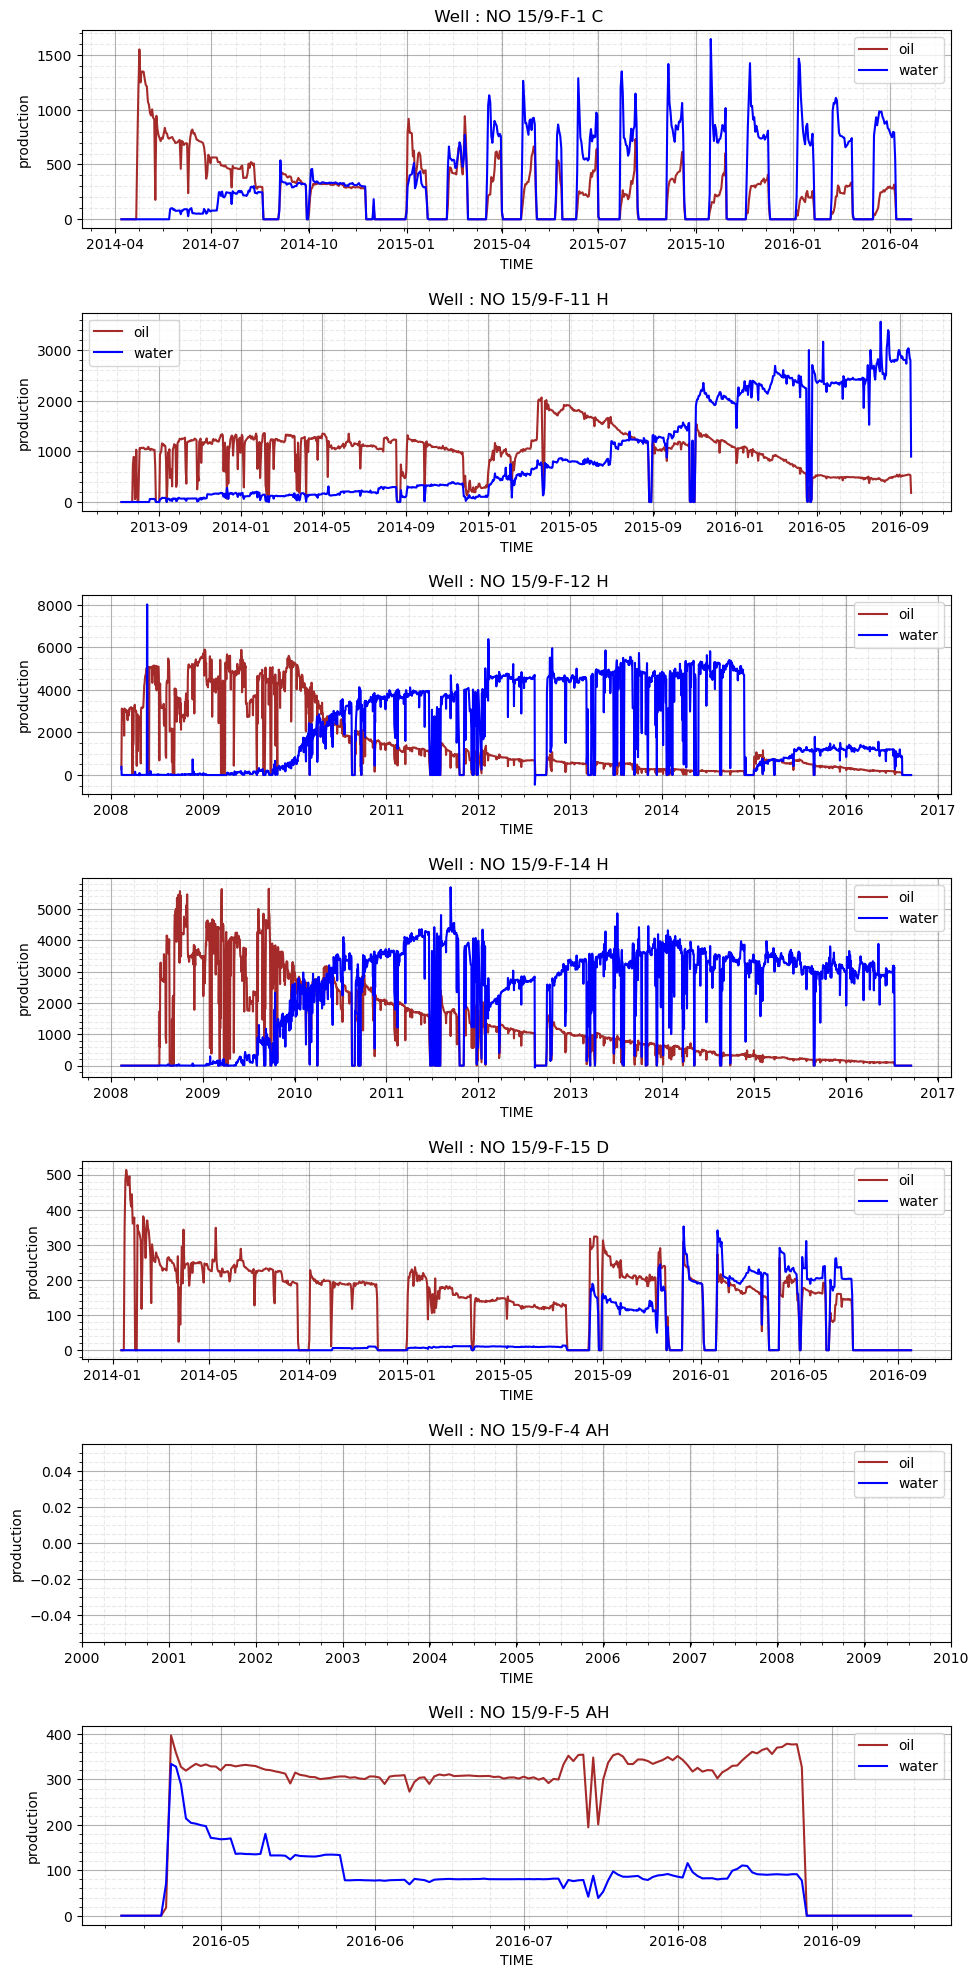

In [22]:
# production profile for each well with subplot
plt.figure(figsize= (10,20))

for i, well in enumerate(wells) :
    plt.subplot(7,1,i+1)
    df_well = df[df["WELL_BORE_CODE"] == well]
    # make scatter plot between oil and gas production
    plt.plot( df_well["DATEPRD"], df_well["BORE_OIL_VOL"] ,label="oil",color="brown") 
    plt.plot( df_well["DATEPRD"], df_well["BORE_WAT_VOL"], label="water", color="blue") 

    # setting axes (x and y) labels 
    plt.xlabel("TIME", )
    plt.ylabel("production")
    plt.title(f" Well : {well}")

    plt.legend()
    # grid 
    plt.grid( which="major", linestyle="-", alpha=.5, color="#6666")
    plt.minorticks_on()
    plt.grid( which="minor", linestyle="--", alpha=.2, color="#9999")
    
plt.tight_layout(pad=1.5)

In [25]:
from ipywidgets import interact

In [27]:
# production profile for each well using interact method 
@interact
def show_profile_for_each_Well( well = wells):
        plt.figure(figsize=(8,4))
        df_well = df[df["WELL_BORE_CODE"] == well]
        # make scatter plot between oil and gas production
        plt.plot( df_well["DATEPRD"], df_well["BORE_OIL_VOL"] ,label="oil",color="brown") 
        plt.plot( df_well["DATEPRD"], df_well["BORE_WAT_VOL"], label="water", color="blue") 

        # setting axes (x and y) labels 
        plt.xlabel("TIME", )
        plt.ylabel("production")
        plt.title(f" Well : {well}")

        plt.legend()
        # grid 
        plt.grid( which="major", linestyle="-", alpha=.5, color="#6666")
        plt.minorticks_on()
        plt.grid( which="minor", linestyle="--", alpha=.2, color="#9999")
    
    

interactive(children=(Dropdown(description='well', options=('NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H…

## <span style="font-weight:900;font-color:#333"> Discover relations 

#### Relation discovering using scatter plot

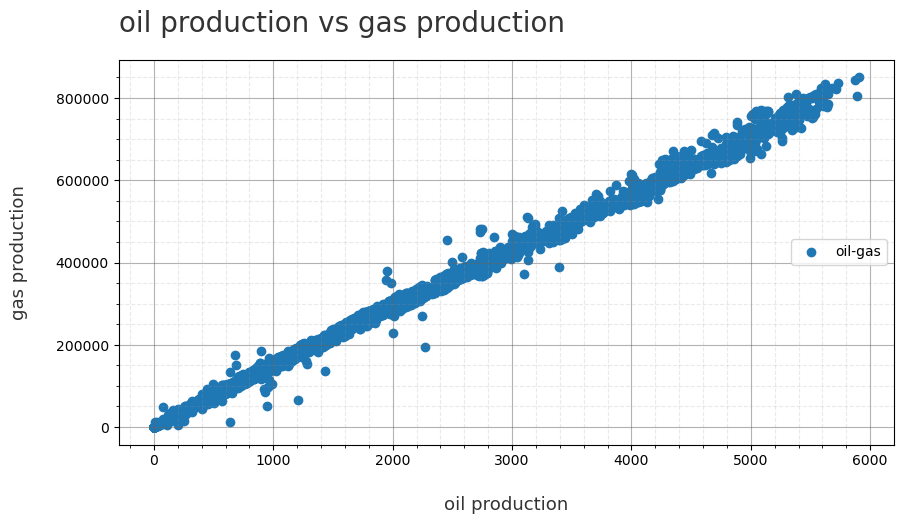

In [28]:
plt.figure(figsize= (10,5))
# make scatter plot between oil and gas production
plt.scatter( df["BORE_OIL_VOL"], df["BORE_GAS_VOL"],label="oil-gas") 

# setting axes (x and y) labels 
plt.xlabel("oil production", fontsize= 13, labelpad = 20,color="#333")
plt.ylabel("gas production", fontsize= 13, labelpad = 20,color="#333",loc="center")

# setting figure title 
plt.title("oil production vs gas production ", fontsize= 20, pad = 20,color="#333",loc="left")

# figure legend
plt.legend(loc="center right")

# grid 
plt.grid( which="major", linestyle="-", alpha=.5, color="#6666")
plt.minorticks_on()
plt.grid( which="minor", linestyle="--", alpha=.2, color="#9999")


#### Seaborn pairplot

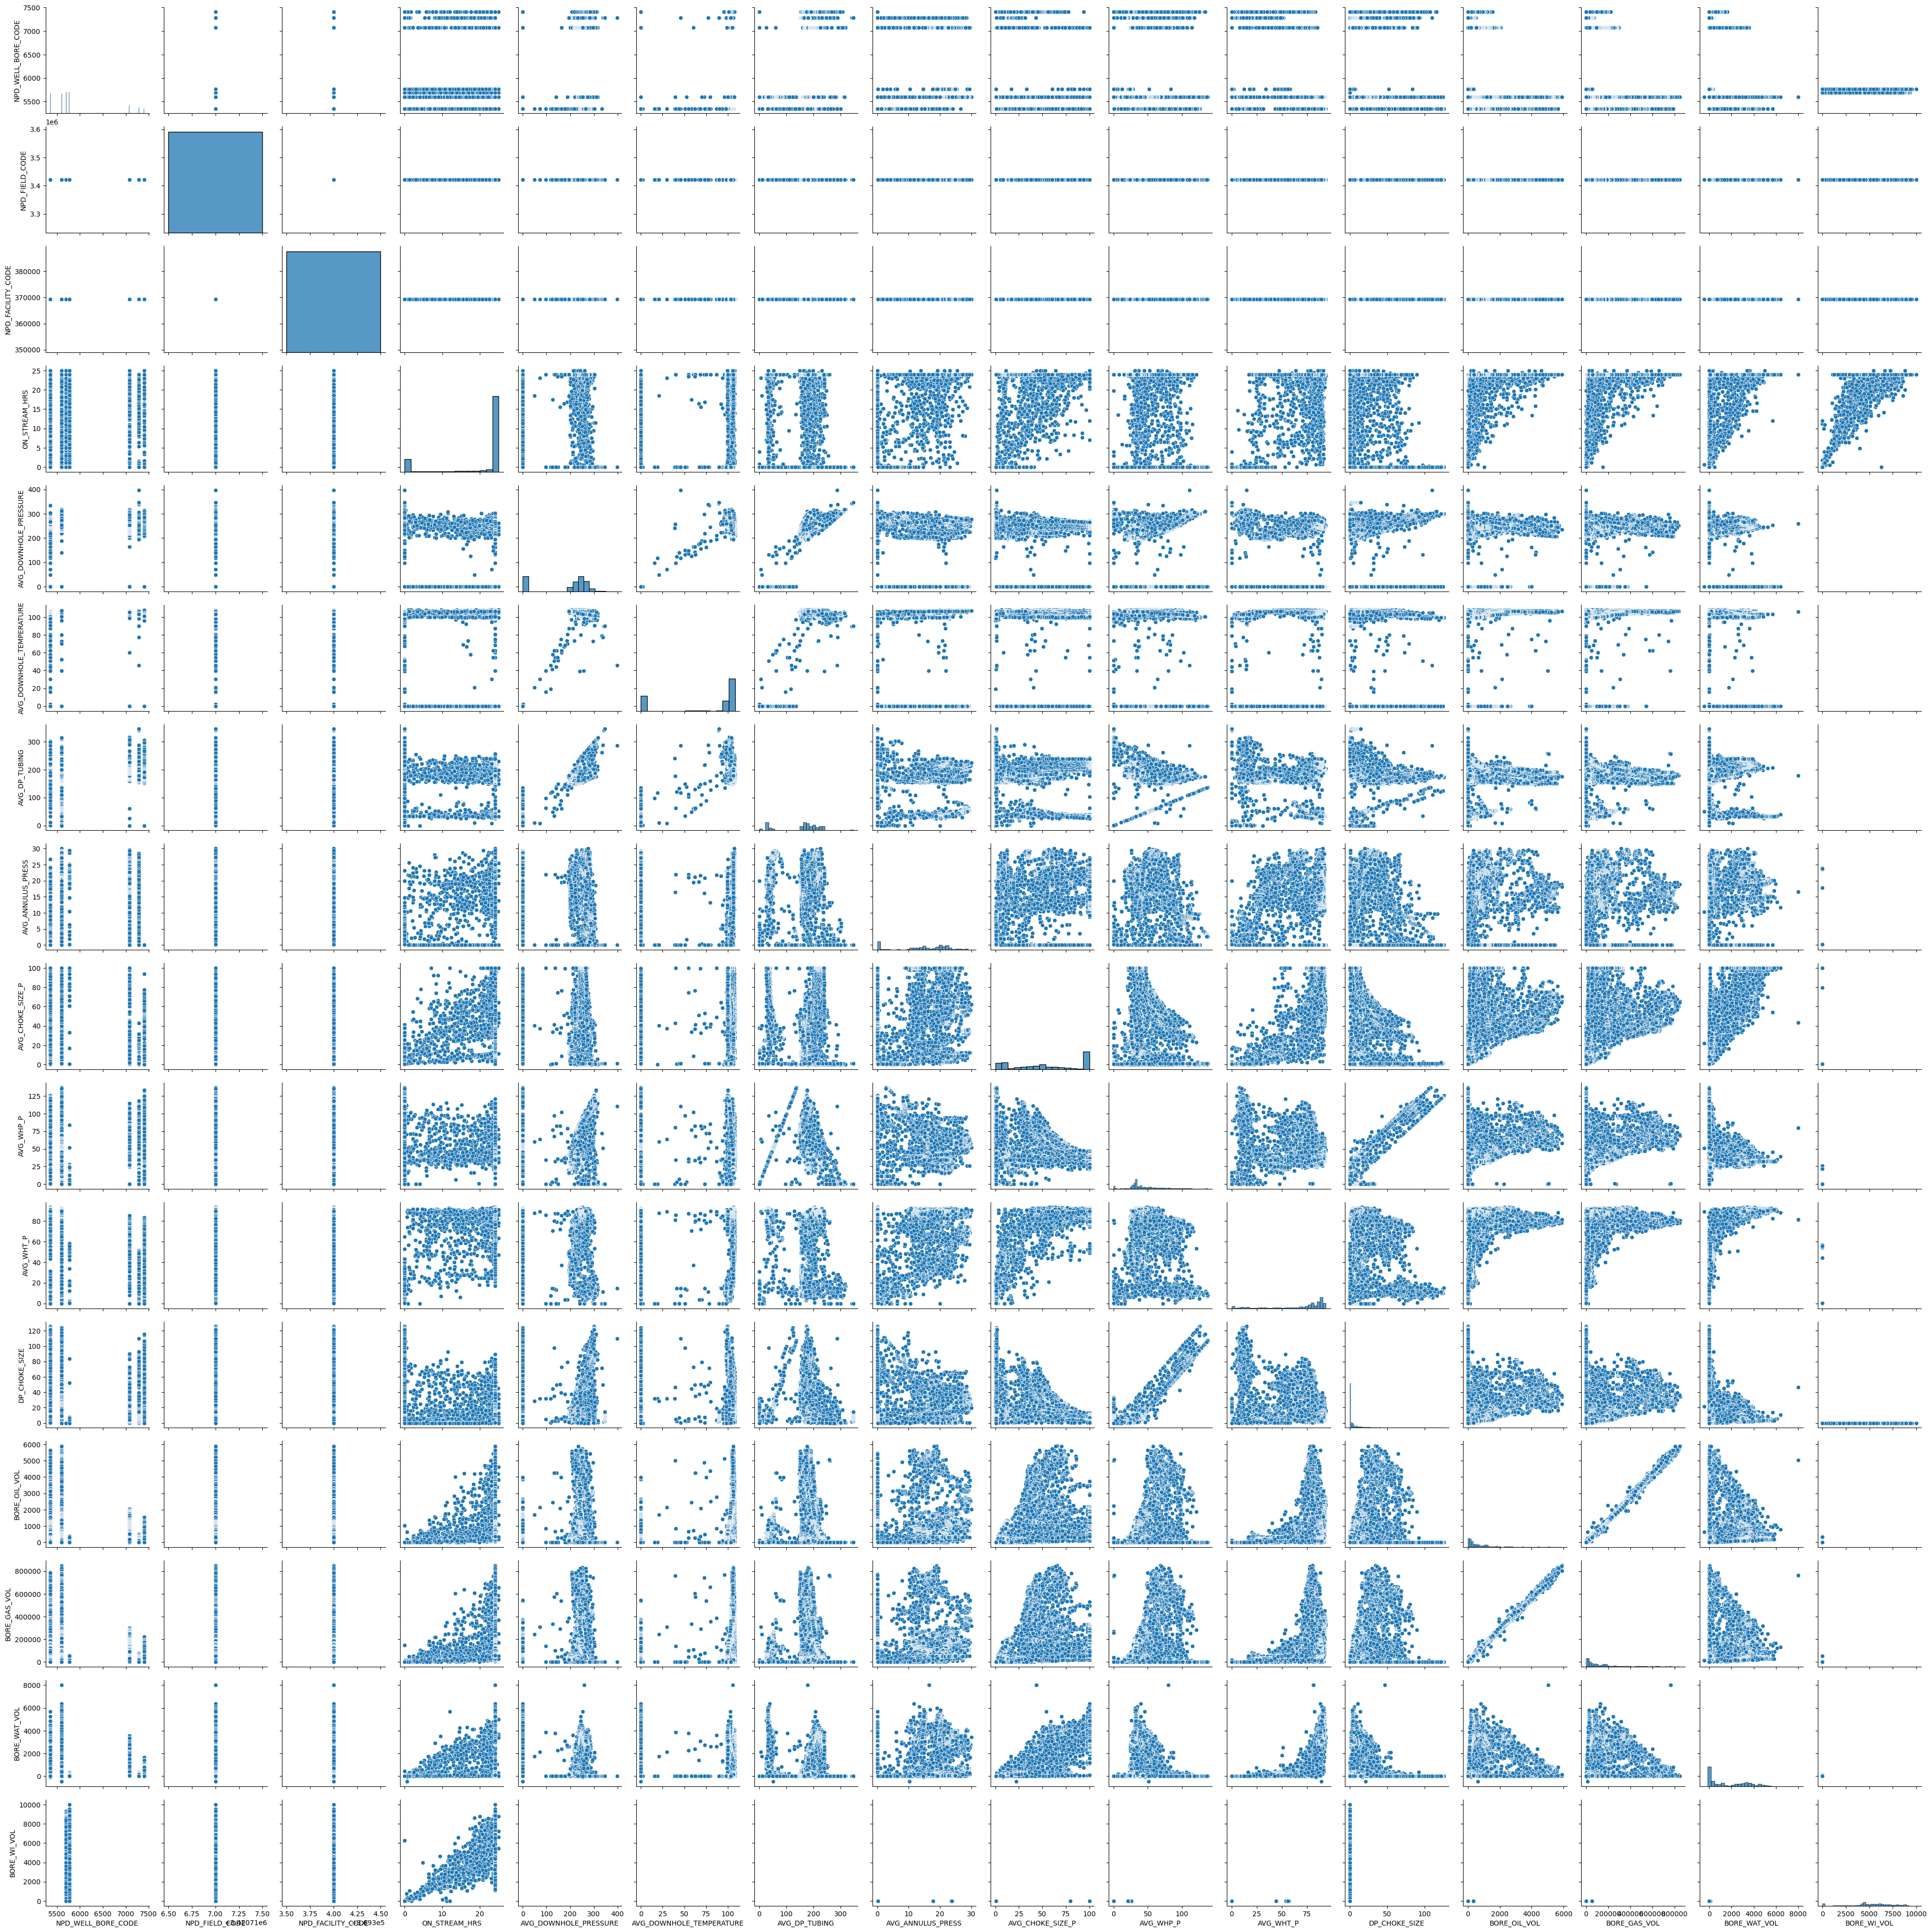

In [34]:
sns.pairplot(df) 

#### Pearson corelation coefficient [ linear corelation ] 

In [29]:
df.corr()

NPD_WELL_BORE_CODE  NPD_FIELD_CODE  \
NPD_WELL_BORE_CODE                  1.000000             NaN   
NPD_FIELD_CODE                           NaN             NaN   
NPD_FACILITY_CODE                        NaN             NaN   
ON_STREAM_HRS                      -0.102270             NaN   
AVG_DOWNHOLE_PRESSURE               0.257481             NaN   
AVG_DOWNHOLE_TEMPERATURE            0.339509             NaN   
AVG_DP_TUBING                       0.218243             NaN   
AVG_ANNULUS_PRESS                   0.141756             NaN   
AVG_CHOKE_SIZE_P                   -0.558461             NaN   
AVG_WHP_P                           0.077946             NaN   
AVG_WHT_P                          -0.519515             NaN   
DP_CHOKE_SIZE                       0.237647             NaN   
BORE_OIL_VOL                       -0.307645             NaN   
BORE_GAS_VOL                       -0.310793             NaN   
BORE_WAT_VOL                       -0.493591             NaN   
BORE_WI_VOL                        -0.055894             NaN   

                          NPD_FACILITY_CODE  ON_STREAM_HRS  \
NPD_WELL_BORE_CODE                      NaN      -0.102270   
NPD_FIELD_CODE                          NaN            NaN   
NPD_FACILITY_CODE                       NaN            NaN   
ON_STREAM_HRS                           NaN       1.000000   
AVG_DOWNHOLE_PRESSURE                   NaN      -0.003092   
AVG_DOWNHOLE_TEMPERATURE                NaN       0.105931   
AVG_DP_TUBING                           NaN       0.002824   
AVG_ANNULUS_PRESS                       NaN       0.482779   
AVG_CHOKE_SIZE_P                        NaN       0.531331   
AVG_WHP_P                               NaN      -0.044900   
AVG_WHT_P                               NaN       0.763229   
DP_CHOKE_SIZE                           NaN      -0.229295   
BORE_OIL_VOL                            NaN       0.342031   
BORE_GAS_VOL                            NaN       0.353713   
BORE_WAT_VOL                            NaN       0.405123   
BORE_WI_VOL                             NaN       0.749544   

                          AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
NPD_WELL_BORE_CODE                     0.257481                  0.339509   
NPD_FIELD_CODE                              NaN                       NaN   
NPD_FACILITY_CODE                           NaN                       NaN   
ON_STREAM_HRS                         -0.003092                  0.105931   
AVG_DOWNHOLE_PRESSURE                  1.000000                  0.967826   
AVG_DOWNHOLE_TEMPERATURE               0.967826                  1.000000   
AVG_DP_TUBING                          0.949734                  0.898954   
AVG_ANNULUS_PRESS                     -0.124023                 -0.087189   
AVG_CHOKE_SIZE_P                      -0.262804                 -0.295764   
AVG_WHP_P                              0.283359                  0.274247   
AVG_WHT_P                             -0.095114                 -0.076801   
DP_CHOKE_SIZE                          0.267649                  0.221986   
BORE_OIL_VOL                           0.248571                  0.289819   
BORE_GAS_VOL                           0.245981                  0.287328   
BORE_WAT_VOL                          -0.296765                 -0.343581   
BORE_WI_VOL                                 NaN                       NaN   

                          AVG_DP_TUBING  AVG_ANNULUS_PRESS  AVG_CHOKE_SIZE_P  \
NPD_WELL_BORE_CODE             0.218243           0.141756         -0.558461   
NPD_FIELD_CODE                      NaN                NaN               NaN   
NPD_FACILITY_CODE                   NaN                NaN               NaN   
ON_STREAM_HRS                  0.002824           0.482779          0.531331   
AVG_DOWNHOLE_PRESSURE          0.949734          -0.124023         -0.262804   
AVG_DOWNHOLE_TEMPERATURE       0.898954          -0.087189         -0.295764   
AVG_DP_TUBIN

<AxesSubplot:>

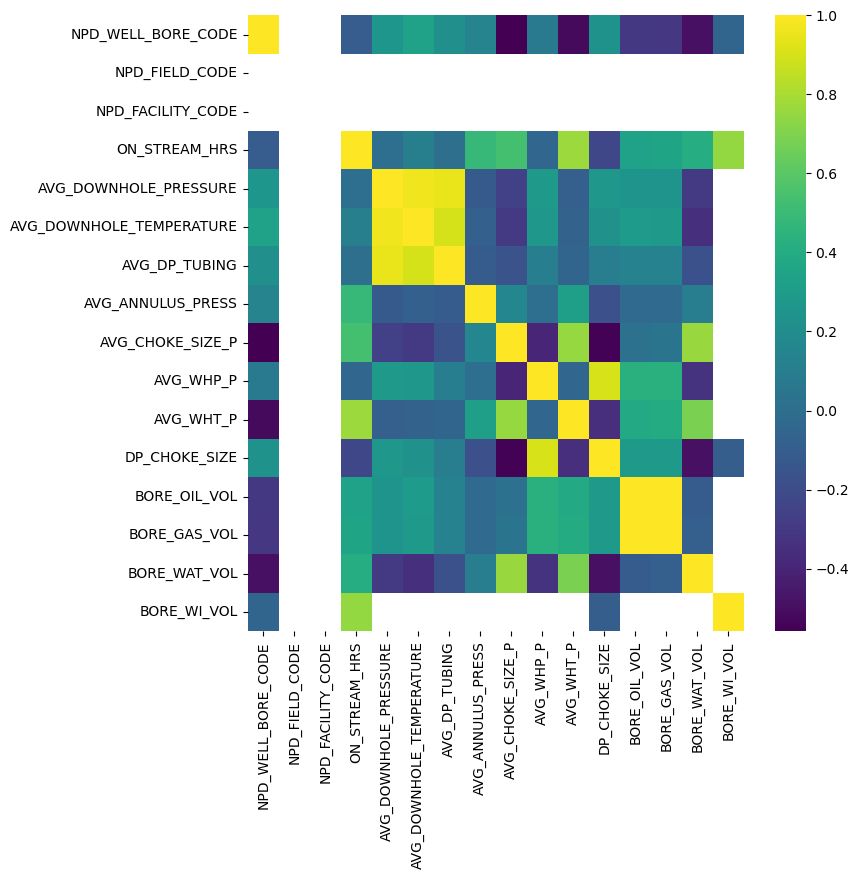

In [33]:
# seaborn heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr() , cmap="viridis")

## <span style="font-weight:900;font-color:#333"> Show variable distribution

C:\Users\ae504\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


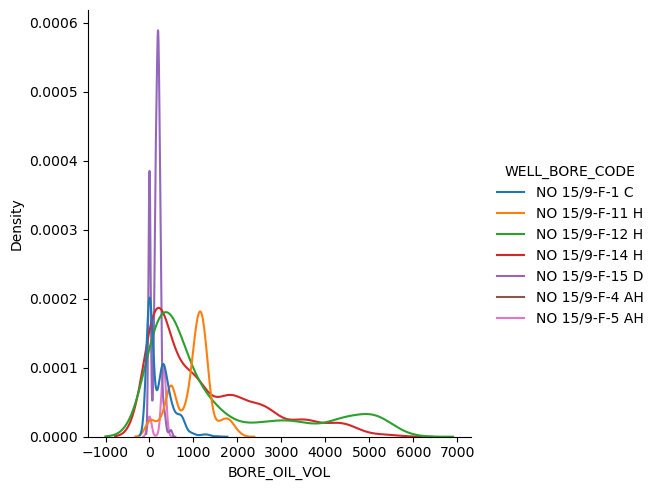

In [48]:
# distplot and kde m with hue for each well

sns.displot( df, x ="BORE_OIL_VOL", kind="kde" , hue="WELL_BORE_CODE") ;

## <span style="font-weight:900;font-color:#333"> Production of TOATL oil and water in each year
   

In [52]:
(df["DATEPRD"].dt.year).unique()

array([2014, 2015, 2016, 2013, 2008, 2009, 2010, 2011, 2012, 2007],
      dtype=int64)

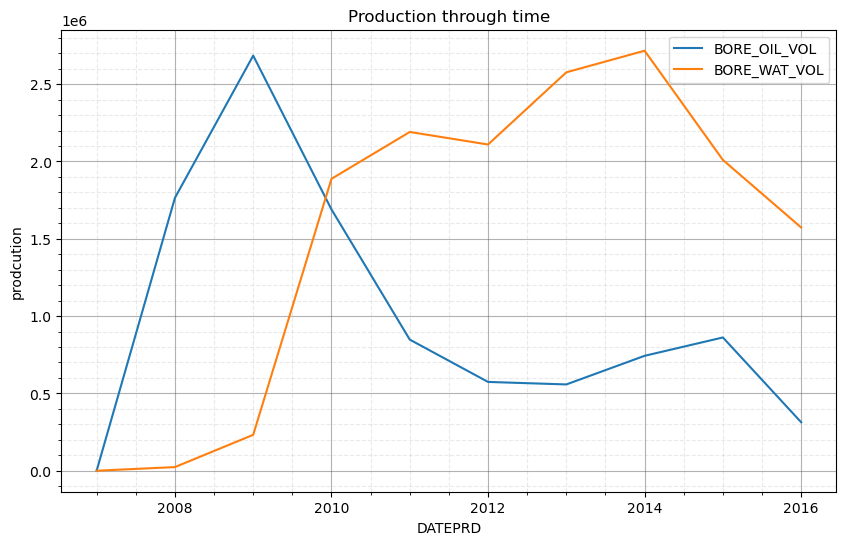

In [66]:
# total production at each year for oil and water , plotting using pandas
fig = ( df.groupby(df["DATEPRD"].dt.year)[["BORE_OIL_VOL","BORE_WAT_VOL"]]
    .sum()
    .plot(
        kind="line",
        figsize=(10,6),
        title="Production through time",
        ylabel="prodcution",));

fig.grid( which="major", linestyle="-", alpha=.5, color="#6666")
fig.minorticks_on()
fig.grid( which="minor", linestyle="--", alpha=.2, color="#9999")

In [1]:
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user

[I 12:24:46 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 12:24:46 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 12:24:46 InstallContribNbextensionsApp] Installing C:\Users\ae504\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 12:24:46 InstallContribNbextensionsApp] Making directory: C:\Users\ae504\AppData\Roaming\jupyter\nbextensions\addbefore\
[I 12:24:46 InstallContribNbextensionsApp] Copying: C:\Users\ae504\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\addbefore.yaml -> C:\Users\ae504\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 12:24:46 InstallContribNbextensionsApp] Copying: C:\Users\ae504\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\icon.png -> C:\Users\ae504\AppData\Roaming\jupyter\nbextensions\addbefore\icon.png
[I 12:24:46 InstallContribNbe